In [1]:
## Importing required libraries

import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_selection import mutual_info_classif
import pandas as pd


import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [2]:
# Reading training data csv file
df= pd.read_csv('/kaggle/input/titanic/train.csv')

# Data Cleaning and Preprocessing

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.shape

(891, 12)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
# Cabin column is unnecessary 
df.drop(columns='Cabin', axis=1, inplace = True)

In [8]:
# Filling the missing data 
df.fillna(df['Age'].mean(), inplace=True)
df.fillna(df['Embarked'].mode(), inplace=True)

In [9]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [10]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [11]:
df.Survived.value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

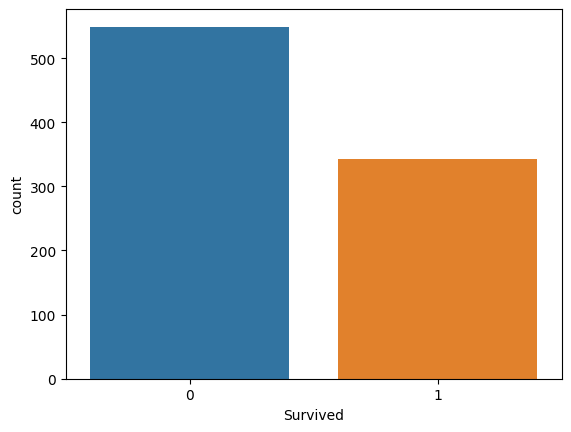

In [12]:
# Count plot for Survived column
sns.countplot(x='Survived', data=df)
plt.show()

In [13]:
df.Sex.value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

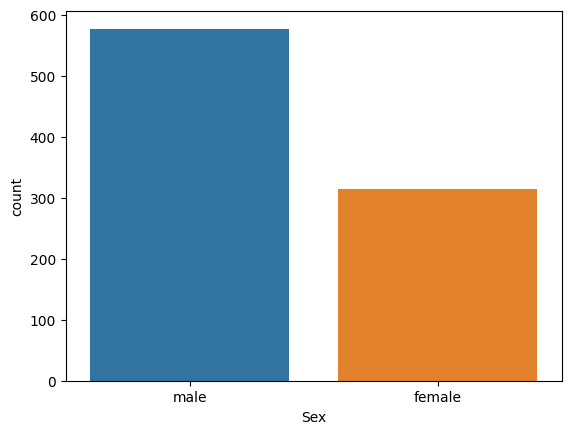

In [14]:
# Count plot for Sex column
sns.countplot(x='Sex', data=df)
plt.show()

In [15]:
df.Pclass.value_counts()

Pclass
3    491
1    216
2    184
Name: count, dtype: int64

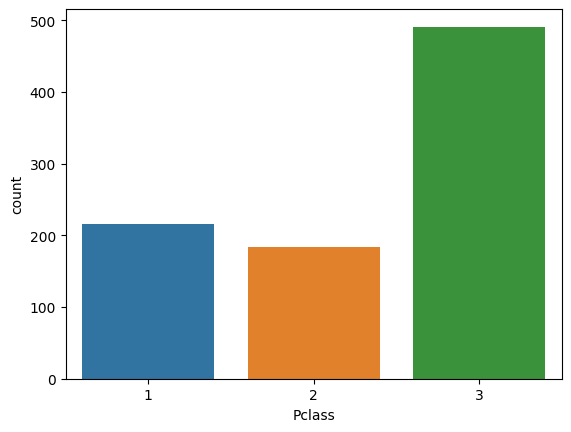

In [16]:
# Count plot for Pclass column
sns.countplot(x='Pclass', data=df)
plt.show()

In [17]:
df.Embarked.value_counts()

Embarked
S                    644
C                    168
Q                     77
29.69911764705882      2
Name: count, dtype: int64

# Converting Catergorical columns

In [18]:
# converting categorical Columns

df.replace({'Sex':{'male':0,'female':1}, 'Embarked':{'S':0,'C':1,'Q':2}}, inplace=True)

In [19]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,0.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,1.0
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,0.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,0.0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,0.0


In [20]:
# Making Feature column and Target column
X = df.drop(columns = ['PassengerId','Name','Ticket','Survived'],axis=1)
Y = df['Survived']

In [21]:
print(X)
# print(Y)

     Pclass  Sex        Age  SibSp  Parch     Fare  Embarked
0         3    0  22.000000      1      0   7.2500       0.0
1         1    1  38.000000      1      0  71.2833       1.0
2         3    1  26.000000      0      0   7.9250       0.0
3         1    1  35.000000      1      0  53.1000       0.0
4         3    0  35.000000      0      0   8.0500       0.0
..      ...  ...        ...    ...    ...      ...       ...
886       2    0  27.000000      0      0  13.0000       0.0
887       1    1  19.000000      0      0  30.0000       0.0
888       3    1  29.699118      1      2  23.4500       0.0
889       1    0  26.000000      0      0  30.0000       1.0
890       3    0  32.000000      0      0   7.7500       2.0

[891 rows x 7 columns]


# Filter Method (Mutual Information) for Feature selection

In [22]:
# X and Y are feature matrix and target variable
importances = mutual_info_classif(X, Y)

# Create a Pandas Series with feature importances
feat_importances = pd.Series(importances, index=X.columns)

# Display the feature importances
print("Feature Importances (Mutual Information):")
print(feat_importances)


Feature Importances (Mutual Information):
Pclass      0.060821
Sex         0.166868
Age         0.030298
SibSp       0.020622
Parch       0.036279
Fare        0.134513
Embarked    0.021150
dtype: float64


In [23]:
# Selecting the Feature matrix again by drop unnecessary columns
X=df.drop(columns = ['PassengerId','Name','Ticket','Survived', 'Parch', 'SibSp' ,'Embarked'],axis=1)

In [24]:
print(X)

     Pclass  Sex        Age     Fare
0         3    0  22.000000   7.2500
1         1    1  38.000000  71.2833
2         3    1  26.000000   7.9250
3         1    1  35.000000  53.1000
4         3    0  35.000000   8.0500
..      ...  ...        ...      ...
886       2    0  27.000000  13.0000
887       1    1  19.000000  30.0000
888       3    1  29.699118  23.4500
889       1    0  26.000000  30.0000
890       3    0  32.000000   7.7500

[891 rows x 4 columns]


# Random Forest

In [25]:
## Libraries for RandomForestClassifier

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [26]:
# Splitting data on training and testing
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=2)

In [27]:
print(X.shape, X_train.shape, X_test.shape)

(891, 4) (712, 4) (179, 4)


In [28]:
# Create a Random Forest classifier
model = RandomForestClassifier(random_state=42)

In [29]:
# Train the model
model.fit(X_train, Y_train)

RandomForestClassifier(random_state=42)

In [30]:
# Make predictions on the test set
predictions = model.predict(X_test)

# Accuracy

In [31]:
# Evaluate the model
accuracy = accuracy_score(Y_test, predictions)
print(f"Accuracy: {accuracy}")

Accuracy: 0.8100558659217877


# Testing on Test Data

In [32]:
test_data = pd.read_csv('/kaggle/input/titanic/test.csv')

In [33]:
test_data.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [34]:
test_data.fillna(df['Age'].mean(), inplace=True)
test_data.fillna(df['Fare'].mean(), inplace=True)

In [35]:
# converting categorical Columns

test_data.replace({'Sex':{'male':0,'female':1}, 'Embarked':{'S':0,'C':1,'Q':2}}, inplace=True)

In [36]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",0,34.5,0,0,330911,7.8292,29.699118,2
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.0,1,0,363272,7.0000,29.699118,0
2,894,2,"Myles, Mr. Thomas Francis",0,62.0,0,0,240276,9.6875,29.699118,2
3,895,3,"Wirz, Mr. Albert",0,27.0,0,0,315154,8.6625,29.699118,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22.0,1,1,3101298,12.2875,29.699118,0


In [37]:
test_data.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [38]:
test=test_data.drop(columns = ['PassengerId', 'Name','Ticket','Cabin', 'Parch', 'SibSp' ,'Embarked'],axis=1)

In [39]:
test.head()

,Pclass,Sex,Age,Fare
0,3,0,34.5,7.8292
1,3,1,47.0,7.0000
2,2,0,62.0,9.6875
3,3,0,27.0,8.6625
4,3,1,22.0,12.2875


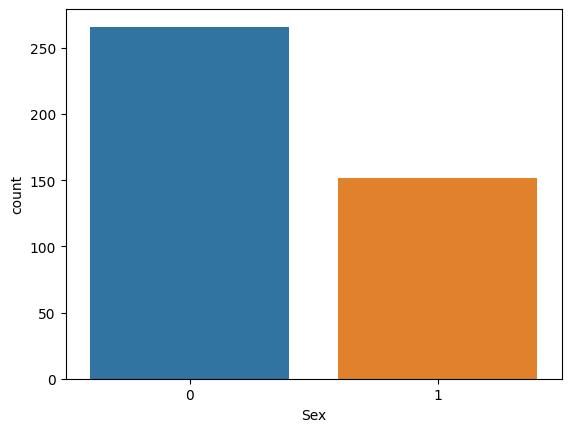

In [40]:
sns.countplot(x='Sex', data=test)
plt.show()

In [41]:
# Make predictions on the test data
test_predictions = model.predict(test)

In [42]:
# Assuming 'PassengerId' is a column in the test data
# Create a DataFrame with 'PassengerId' and corresponding predictions
submission_df = pd.DataFrame({'PassengerId': test_data['PassengerId'], 'Survived': test_predictions})

# Final Output CSV

In [43]:
# Save the predictions to a CSV file
submission_df.to_csv('submission.csv', index=False)

In [44]:
my_df = pd.read_csv('/kaggle/working/submission.csv')

In [45]:
display(my_df.to_string())

'     PassengerId  Survived\n0            892         0\n1            893         0\n2            894         1\n3            895         1\n4            896         0\n5            897         0\n6            898         0\n7            899         0\n8            900         1\n9            901         0\n10           902         0\n11           903         0\n12           904         1\n13           905         0\n14           906         1\n15           907         1\n16           908         0\n17           909         0\n18           910         1\n19           911         0\n20           912         0\n21           913         0\n22           914         1\n23           915         0\n24           916         1\n25           917         0\n26           918         1\n27           919         0\n28           920         0\n29           921         0\n30           922         0\n31           923         0\n32           924         1\n33           925         0\n34           926   

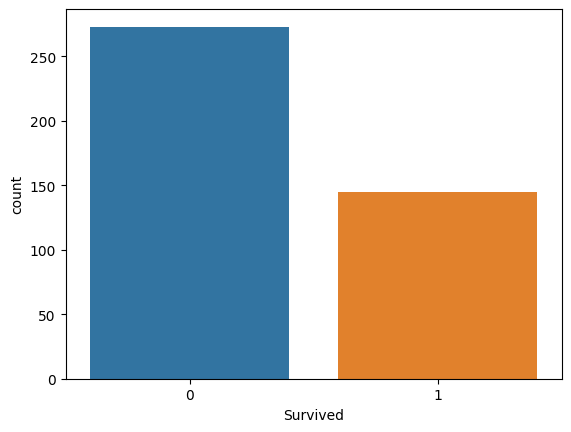

In [46]:
sns.countplot(x='Survived', data=my_df)
plt.show()